<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OLG-Recursive-Equilibrium-Mapping" data-toc-modified-id="OLG-Recursive-Equilibrium-Mapping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OLG Recursive Equilibrium Mapping</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Suggested-answers" data-toc-modified-id="Suggested-answers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Suggested answers</a></span></li><li><span><a href="#Exercise-(General-preference-function)" data-toc-modified-id="Exercise-(General-preference-function)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercise (General preference function)</a></span></li><li><span><a href="#Suggested-Answer" data-toc-modified-id="Suggested-Answer-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Suggested Answer</a></span></li><li><span><a href="#Your-play-now-..." data-toc-modified-id="Your-play-now-...-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Your play now ...</a></span></li></ul></li></ul></div>

# OLG Recursive Equilibrium Mapping

Author: Timothy Kam



Key Learning Points:

* Economics:
    * *Recursive competitive equilibrium* concept
    * Representation of dynamic competitive equilibrium as some mathematical operator
    * Fixed point of recursive map as *steady-state* equilibrium *point*
* Skills: Baptism by Fire or How to be a confident Pythonista
    * Lists and arrays
    * Some NumPy tricks
    * Root finding (scalar) using SciPy
    * Methods/functions
    * The `lambda` function
    * Programming Loops and relation to recursive economic equilibrium operator
    * Simulation and Graphical Visualization

In [1]:
# Forage, use as you need. Be kind, rewind.
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.mlab as mlab   # For plotting given distribution functions
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import cm

In [2]:
%matplotlib inline

## Exercise

Consider an example of the Allais-Samuelson-Diamond OLG model with capital. An agent (born young at date $t \in \mathbb{N}$) consumes $c_{y,t}$ when young and $c_{o,t+1}$ when old. There is an infinite set of such agents on the interval $[0,1]$. The date-$t$ young agent has a preference ordering over $(c_{y,t}, c_{o,t+1})$ streams which is represented by the felicity function:
$$
    U(c_{y,t},c_{o,t+1}) = \ln(c_{y,t}) + \beta \ln(c_{o,t+1}),
$$
where $\beta > 0$. The sequence of budget constraints for the agent is:
$$
    c_{y,t} + s_{t} = w_{t} \times 1,
$$
and,
$$
    c_{o,t+1} = R_{t+1}s_{t},
$$
where $s_{t}$ is savings flow, $w_{t}$ and $R_{t}-1$, respectively, are competitive equilibrium real rental rates on labor and capital.

Capital is assumed to depreciate fully in each period. Total saving in the economy, $s_{t} \times 1$, equals new capital next period: $k_{t+1} = s_{t}$. 

Let $k$ denote the capital-to-labor ratio, $(A,k) \mapsto f(A,k)$ is the production function, and $(A,k) \mapsto f_{k}(A,k)$ is its first-order derivative function (with respect to $k$). Instantiate $f$ by $f(A_{t}, k_{t}) = A_{t}k_{t}^{\alpha}$. The firm is perfectly competitive in both its product market and its factor input (capital and labor rental) market, and maximizes profits.

Below we'll do the following:

0. Write down each generation's ex-ante decision problem and characterize their optimal behavior.
1. Do the same for the firm.
2. Define a recursive (dynamic) competitive equilibrium (list quantities and pricesand their corresponding demand/supply and market clearing conditions).
3. Let $\alpha = 0.33$, $\beta = 1.0/(1.0+0.04^{35})$, and $A_{t} = 1.0$ for all $t$. Calculate the (nontrivial) steady state value of $k>0$.
4. Pick an initial $k_{0} < k$. Compute the economy's dynamic equilibrium outcome in terms of the variable $k_{t}$ beginning from your chosen $k_{0}$ for $T = 100$ periods.


## Suggested answers

*Part 1*

You can set this up as a Lagrange problem or simply substitute in the constraints and maximize over the choice variable $s_{t}$. The optimal consumption/savings functions, given market prices---$(w_{t}, R_{t})$ measured in units of the final consumption good)---are solutions to the necessary and sufficient conditions (why *and*?):
    $$
    \left(\frac{1}{c_{y,t}}\right) = \beta \left( \frac{1}{c_{o,t+1}} \right) R_{t+1},
    $$ 
    and,
    $$
    c_{y,t} + s_{t} = w_{t} \times 1,
    $$
    and also,
    $$
        c_{o,t+1} = R_{t+1}s_{t}.
    $$
    Trivia: Can you interpret in words, the economic meaning of these conditions, especially the first one?

*Part 2*

The firm solves:
$$
\max_{K_{t}, N_{t}} f(A_{t},K_{t}/N_{t})N_{t} - \tilde{r}_{t}K_{t} - w_{t} N_{t}.
$$

Let's pause and think about an accounting/finance matter: 
* $\tilde{r}_{t} := (R_{t}-1 + \delta)$ is the (effective) real rental rate faced by the firm for renting capital. 
* It has two parts: $R_{t}-1$, the market real rate of return it pays back to savers, and $\delta$, the capital depreciation rate. 
* Intuitively, in a competitive equilibrium, zero arbitrage requires that the gross return $R_{t}$ on any form of savings vehicle (asset) must equal the gross return on capital as a savings device, but capital may depreciate. 
* Hence the requirement that $R_{t} = (1 + \tilde{r}_{t}) - \delta$, where the RHS is the gross return paid by firms for renting capital, but a saver needs to adjust it for the depreciation margin too. Otherwise, there is positive arbitrage profits to be made, and that cannot constitute an equilibrium.

In our special setting, since $\delta = 1$, the firm's profit maximizing decisions in our parametric instance are given by these necessary and sufficient conditions (why *and*?):

$$
w_{t} = (1 − \alpha) A k_{t}^{\alpha},
$$
and
$$
R_{t} = \alpha A k_{t}^{\alpha}.
$$

*Part 3*

Before you go into robot-algebra mode, think a little about the conditions we just derived from parts 1 and 2 above. From part 1, we get the aggregate demand for consumption goods (or supply of savings) and from part 2, we get firms' aggregate demand for labor and capital (savings transformed). 

Now you might wonder: Where's the friggin' labor supply? Since households do not have labor/leisure in their valuation function they'd supply whatever labor units they are endowed with (say this is normalized to $1$). Hence $k$ is both the capital-to-labor ratio and also aggregate capital. 

OK, we've derived demand and supply functions for factors of production. We have three markets (goods, labor and capital). It suffices to ensure that demand equals supply in the last two: The budget constraints will ensure that the other market clears too. (That's the magic of Walrasian general equilibrium!) 

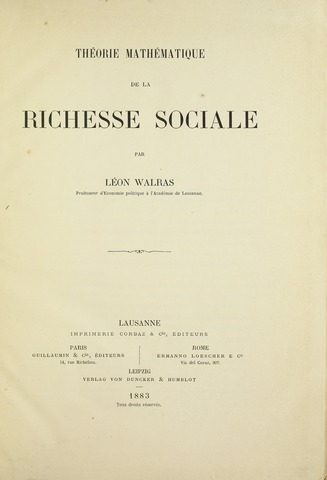

In [3]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Walras_-_Th%C3%A9orie_math%C3%A9matique_de_la_richesse_sociale%2C_1883_-_5834436.tif/lossy-page1-327px-Walras_-_Th%C3%A9orie_math%C3%A9matique_de_la_richesse_sociale%2C_1883_-_5834436.tif.jpg'
Image(url,width=327, height=480)

So, give it all a good algebraic jiggle, you should have a version of the following (concise) definition:  Given an initial state $k_{0}$, a *(recursive) competitive (general) equilibrium* in this model is an infinite sequence (allocation) $\{k_{t+1}\}_{t=0}^{\infty}$ and a pricing system $\{w_{t}, R_{t}\}_{t=0}^{\infty}$ satisfying these conditions:

$$
w_{t} = (1 − \alpha) A k_{t}^{\alpha}, 
$$
and,
$$
R_{t} = \alpha A k_{t}^{\alpha-1},
$$
and also,
$$
k_{t+1} = \frac{\beta (1-\alpha)}{1+\beta} A k_{t}^{\alpha}.
$$

What do they represent (in words)?

*Part 4*

Evaluate the (last) autonomous difference equation, which has the recursive form $k_{t+1} = h(k_t)$ at a (nontrivial) deterministic steady state, $k_{ss} = k_{t+1} = k_{t} > 0$. This will give us a particular trajectory of equilibrium outcomes, as a function of the given initial state $k_0$.

In [4]:
# Parameters of special-case Diamond OLG model
ALPHA = 0.33
BETA = 1.0/(1.0+0.0435)
A = 1.0

In [5]:
# Define the dynamic equilibrium (i.e., RCE) map
def h(k, A):
    """Special case Diamond OLG RCE transition function"""
    konstant = BETA*(1.0-ALPHA)/(1.0+BETA)
    return konstant*A*(k**ALPHA)

In [6]:
# We'll solve for kss > 0 numerically (although can be done by hand!)
def g(k, A):
    return h(k, A) - k
kss = optimize.brentq(g, 1e-20, 20.0, args=(A,))
# Check visually
print("Strictly positive steady-state kss =%6.3f" %(kss))

Strictly positive steady-state kss = 0.189


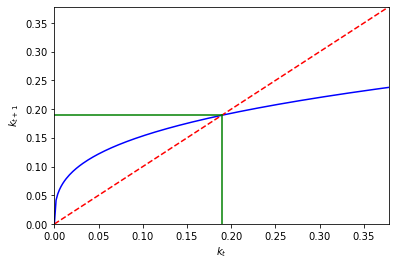

In [7]:
kmax = kss*2.0
X = np.linspace(0., kmax, 200)
kssline = np.linspace(0.,kss,2)
ksstile = np.tile(kss,2)
# Figure
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(X.min(), X.max()), ylim=(X.min(), X.max()))
ax.plot(X, h(X, A), '-b', 
        X, X, '--r', 
        ksstile, kssline, '-g', 
        kssline, ksstile, '-g',
       )
plt.xlabel(r"$k_{t}$")
plt.ylabel(r"$k_{t+1}$")
plt.show()

*Part 5*

Observe that we really only need to worry about solving the (last) autonomous difference equation, which has the recursive form $k_{t+1} = h(k_t)$, from part 2 above. Everything else can be backed out once we have the allocation in terms of $k$. I think you can take it from here on, as mechanically, this is just like the exercise you've done with Solow-Swan with just a little bit more garam masala added.

In [8]:
def simulate_olg(k_init=0.01, A_init=A, T=100):
    """Simulate determinstic or stochastic OLG model (special case)"""
    kpath = np.empty(T)
    kpath[0] = k_init
    Apath = np.tile(A_init, T)
    for t in range(T-1):
        kpath[t+1] = h(kpath[t], Apath[t])
    return kpath, Apath

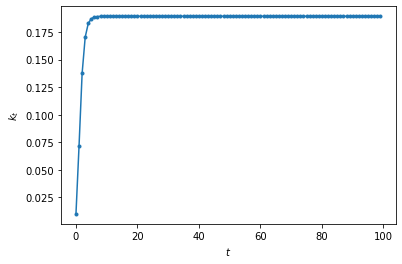

In [9]:
# Invoke a simulation instance
ksim, Asim = simulate_olg()
# Figure
fig = plt.figure(facecolor='white')
plt.plot(ksim, '.-')
plt.xlabel(r"$t$")
plt.ylabel(r"$k_{t}$")
plt.show()


## Exercise (General preference function)

Redo the previous special case, but now assuming that 
$$
    U(c_{y,t},c_{o,t+1}) = u(c_{y,t}) + \beta u(c_{o,t+1}),
$$
where 
$$
    u(x) = \lim_{\hat{\theta} \rightarrow \theta}\frac{x^{1-\hat{\theta}} - 1}{1-\hat{\theta}}, \qquad \theta > 0.
$$
For the example calculations, we'll set $\theta = 2.0$ below.

## Suggested Answer

I will construct the answer to the case where $A = 1$ (constant). 

**Consumer problem**

You can set this up as a Lagrange problem or simply substitute in the constraints and maximize over the choice variable $s_{t}$. The optimal consumption/savings functions, given market prices---$(w_{t}, R_{t})$ measured in units of the final consumption good)---are solutions to the necessary and sufficient conditions:
$$
\beta \left(\frac{c_{o,t+1}}{c_{y,t}}\right)^{-\theta} = \frac{1}{R_{t+1}},
$$ 
and,
$$
c_{y,t} + s_{t} = w_{t} \times 1,
$$
and also,
$$
    c_{o,t+1} = R_{t+1}s_{t}.
$$

The first condition says:
* LHS: the consumer's personal (intertemporal) marginal rate of substitution between young-age and old-age consumption (i.e., her "internal terms of trade");

* RHS: the market terms of trade, or real exchange rate, or relative price--the ratio of the price of a unit of consumption when old ($1/R_{t+1}$) to the price of a unit of consumption when young (normalized to 1).

In an equilibrium, the consumer is choosing the optimal bundle such that LHS equals RHS.

The second and third conditions give us back the consumer's present-value lifetime budget constraint. Again, an optimizing agent in equilibrium must be choosing an affordable bundle that is on the boundary of her budget set (hence the binding budget constraint). 

(Three conditions)

**Firm's problem**

Same as before. (Two conditions)

**Market clearing**

Same as before. (Two conditions: labor demand equals labor supply; capital demand next period equals savings supply end of this period.)

**(Recursive) Competitive/General Equilibrium**

Combining consumer and firm best-response characterizations (i.e., FoCs) along with market clearing conditions, we can have the following equilibrium description:

**Definition**. Given an initial state $k_{0}$, a *(recursive) competitive equilibrium* in this model is an infinite sequence (allocation) $\{k_{t+1}, s_{t}\}_{t=0}^{\infty}$ and a pricing system $\{w_{t}, R_{t}\}_{t=0}^{\infty}$ satisfying these conditions:

$$
w_{t} = W(k_{t}) :=(1 − \alpha) A k_{t}^{\alpha}, 
$$
and,
$$
R_{t} = R(k_{t}) := \alpha A k_{t}^{\alpha-1},
$$
and also,
$$
k_{t+1} = S(R_{t+1}) w_{t},
$$
where
$$
S(R_{t}) = \frac{(R_{t})^{(1-\theta)/\theta}}{(1/\beta)^{-\theta} + (R_{t})^{(1-\theta)/\theta}}.
$$

Note: Plug date-$(t+1)$ version of (19) and also plug (18) into (20) we get:

$$
k_{t+1} = S(\alpha A k_{t+1}^{\alpha-1}) (1 − \alpha) A k_{t}^{\alpha},
$$

or,

$$
k_{t+1} - \frac{(\alpha A k_{t+1}^{\alpha-1})^{(1-\theta)/\theta}}{(1/\beta)^{-\theta} + (\alpha A k_{t+1}^{\alpha-1})^{(1-\theta)/\theta}} (1 − \alpha) A k_{t}^{\alpha} = 0,
$$

Note that now we have additional nonlinearities in the RCE map due to the fact that $\theta > 0$ and $\theta \neq 1$. You can still simplify the recursive map down to a (nonlinear) difference equation in $k$, but it will be an implicit map $H(k_{t+1},k_{t}) = 0$. For every date $t$, there is a unique solution to this map at each fixed/known $k_{t}$. Why? Note that on the RHS of the explicit difference equation, $S\circ R (\cdot)$ is continuous and monotone in $R \in [0, \infty)$. A rise in $R_{t}$ (i.e., a decrease in the relative price of old-age consumption to young-age consumption $1/R$) has two effects: income effect (reduce saving) vs. substitution effect (increase saving). Here,
* $S(R)$ is increasing in $R$ if $\theta < 1$: substitution effect dominates income effect
* $S(R)$ is decreasing in $R$ if $\theta > 1$: substitution effect is dominated income effect
* $S(R)$ is a constant if $\theta = 1$: both effects cancel out

We know $R = R(k)$ is decreasing and continuous in $k$. So we can deduce that:
* $S\circ R(k)$ is decreasing in $k$ if $\theta < 1$
* $S\circ R(k)$ is increasing in $k$ if $\theta > 1$
* $S\circ R(k)$ is a constant if $\theta = 1$

Moreover, we can check that $S(R)$ is always positive valued and less than $1$. And the LHS is just linear in $k_{t+1}$. So there is always a unique solution $k_{t+1}$ to $H(k_{t+1},k_{t}) = 0$, at every given $k_{t} > 0$.

In [10]:
α = 0.33
β = 0.9
θ = 2.0
A = 1.0

def f(k, A, α):
    """Per-worker Cobb-Douglas production"""
    return (1.0-α)*A*k**α

kmin = 0.0000001
kmax = 10.0
#kmax = min( optimize.brentq(lambda k: f(k, A, α) - k, kmin, kmax), kmax) 
print("Feasible state space:")
print("kmin = %6.3f" % (kmin))
print("kmax = %6.3f" % (kmax))

Feasible state space:
kmin =  0.000
kmax = 10.000


In [11]:
def W(k, A, α):
    """MPL"""
    return (1.0-α)*A*k**α

def R(k, A, α):
    """MPK"""
    return α*A*k**(α-1.0)

def SR(k, A, α, β, θ):
    """Composite saving-rate function S(R(k))"""
    RR = (R(k, A, α))**((1.0-θ)/θ)
    bR = (1.0/β)**(1.0/θ)
    return RR/(bR + RR)

In [12]:
def H(kprime, k, A, α, β, θ):
    """Define H(k, k')"""
    return kprime - SR(kprime, A, α, β, θ)*W(k, A, α)
    
def h(k, A, α, β, θ):
    """Solve for implicit kprime = h(k)"""
    return optimize.brentq(H, kmin, kmax, args=(k, A, α, β, θ))

In [13]:
def diamond_steadystate(A=1.0, α=0.33, β=0.9, θ=1.0):
    return optimize.brentq(lambda k: h(k, A, α, β, θ)-k, kmin, kmax)

In [14]:
def diamond_simulate(k0=0.01, T=30, A=1.0, α=0.33, β=0.9, θ=1.0):
    """Solving for the trajectory of capital in an RCE"""
    k = k0
    kpath = [k]
    for t in range(T-1):
        kprime = h(k, A, α, β, θ)
        kpath.append(kprime)
        k = kprime
    return np.asarray(kpath)

In [21]:
# Visualization method - Phase plot
def diamond_phase(A=1.0, α=0.33, β=0.9, θ=1.0, kmax=0.5):
    # Steady state (k > 0):
    kss = diamond_steadystate(A, α, β, θ)
    print("Steady state (k > 0) = %6.3f" % (kss))
    # Solve for RCE path
    X = np.linspace(kmin, kmax, 1000)
    knext = [ h(k, A, α, β, θ) for k in X ]
    # Plot them
    plt.plot(X, knext, '-b', label=r'Equilibrium map $g$')
    plt.plot(X, X, '-r', alpha=0.2, label=r'$45^{\circ}$')
    plt.ylabel(r"$k_{t+1}$")
    plt.xlabel(r"$k_{t}$")
    plt.legend()
    plt.show()

Steady state (k > 0) =  0.187


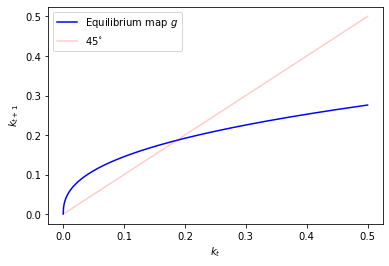

In [22]:
# Visualize for case when THETA = 2
diamond_phase(θ=2.0)

In [23]:
# Visualization method - Time path
def diamond_kshow(k0=0.01, T=30, A=1.0, α=0.33, β=0.9, θ=1.0):
    # Steady state (k > 0):
    kss = diamond_steadystate(A, α, β, θ)
    print("Steady state (k > 0) = %6.3f" % (kss))
    # Solve for RCE path
    ksim = diamond_simulate(k0, T, A, α, β, θ)
    # Plot them
    dates = np.arange(ksim.size)
    plt.plot(dates, ksim, '-o', dates, np.tile(kss, ksim.shape), '-r')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$k_{t}$")
    plt.show()

Steady state (k > 0) =  0.187


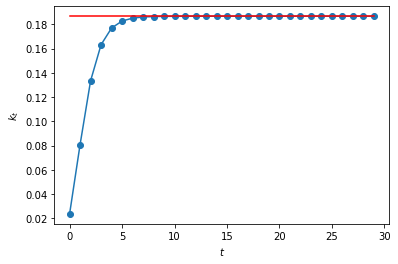

In [24]:
# Visualize for case when THETA = 2
diamond_kshow(k0=0.0235481, θ=2.0)

In [25]:
# Now let's make it interactive
from ipywidgets import interact, fixed
interact(diamond_phase, 
              A=(1.0,1.5), 
              α=(0.2,0.4), 
              β=(0.1, 0.99999), 
              θ=(0.1, 20.0),
              kmax=fixed(1.0)
             )
plt.show()

interactive(children=(FloatSlider(value=1.0, description='A', max=1.5, min=1.0), FloatSlider(value=0.33, descr…

In [26]:
# Interactive time path - comparative dynamics
interact(diamond_kshow, 
              k0=(0.01, 3.0),
              T=(10,100), 
              A=(1.0,1.5), 
              α=(0.2,0.4), 
              β=(0.1, 0.99), 
              θ=(0.1, 20.0)
             )
plt.show()

interactive(children=(FloatSlider(value=0.01, description='k0', max=3.0, min=0.01), IntSlider(value=30, descri…

So the above example assumes there to be no government. What if now there is a constant tax on each young person $\tau$ each period and this is transferred to the contemporaneous old?

## Your play now ...

So the above example assumes there to be no government. What if now there is a constant tax on each young person $\tau$ each period and this is transferred to the contemporaneous old